<a href="https://colab.research.google.com/github/souluizleme/bootcamp_data_science_alura/blob/main/Bootcamp_Datascience_Hospitalar_Desafios_Modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Aquisição e leitura de dados reais

In [141]:
import pandas as pd

In [142]:
dados_datasus = "https://raw.githubusercontent.com/souluizleme/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"

In [143]:
# Lendo os dados do CSV, ignorando as linhas iniciais de cabeçalho, informando o separador ; , ignorando as últimas linhas e ajustando o separador de milhar e decimal
dados = pd.read_csv(dados_datasus, encoding="ISO-8859-1",
                    skiprows = 3 ,sep=";", skipfooter = 12,
                    thousands=".", decimal=",")
dados.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [144]:
pd.options.display.float_format = "{:.2f}".format
dados["2008/Ago"]

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42487939.51
19   179898070.22
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21041071.33
26    11548451.89
Name: 2008/Ago, dtype: float64

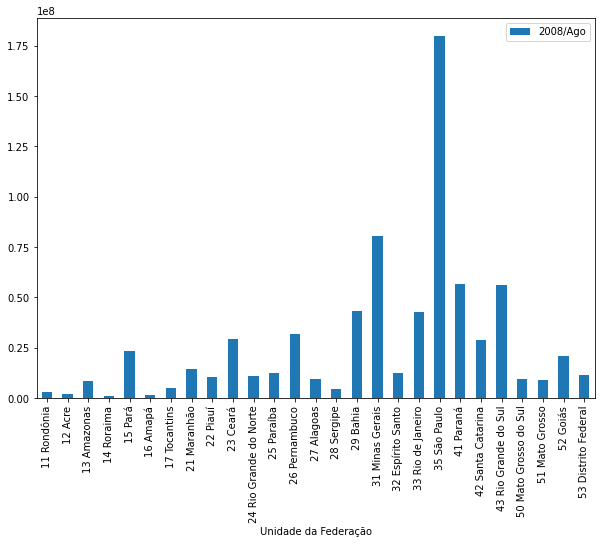

In [145]:
dados.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(10,7))

### Desafio 01: Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.

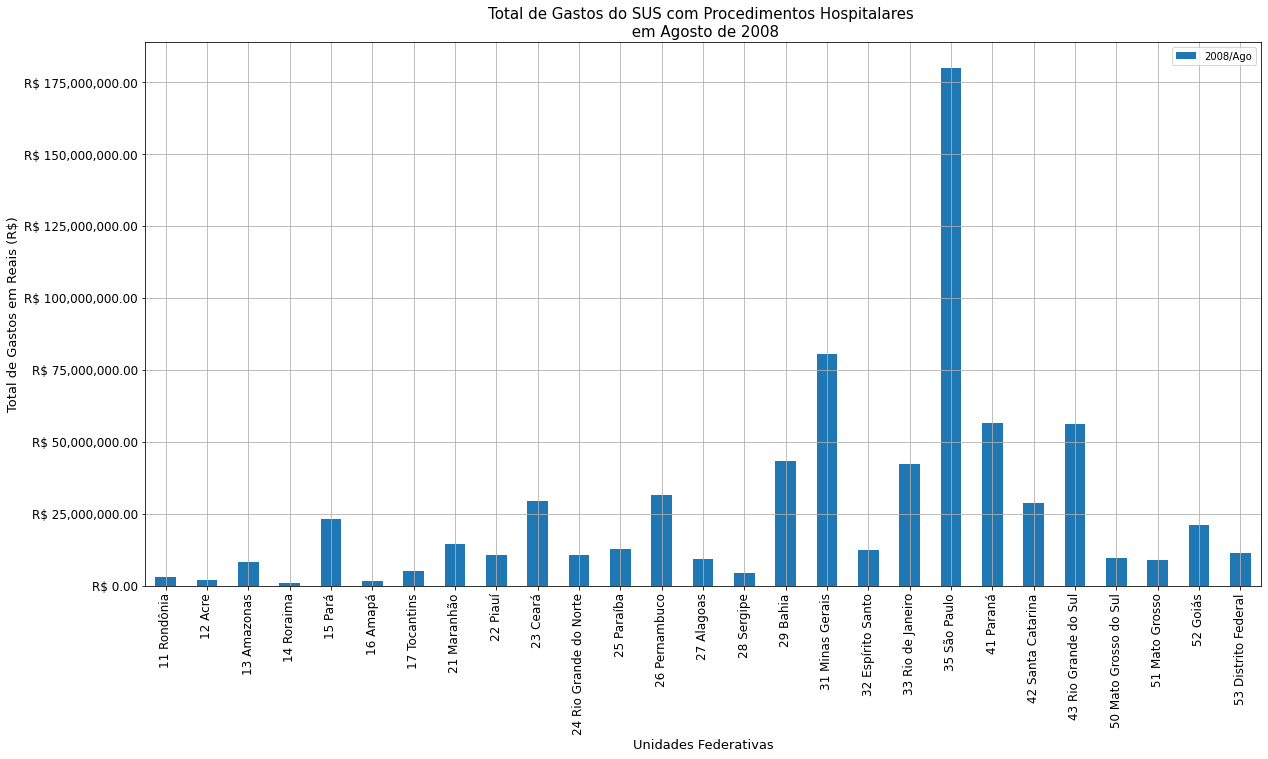

In [146]:
#Plotando um gráfico com um título mais sugestivo

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(20,10), grid=True, fontsize=12)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.ylabel('Total de Gastos em Reais (R$)', fontsize=13)
plt.xlabel("Unidades Federativas", fontsize=13)
plt.title("Total de Gastos do SUS com Procedimentos Hospitalares \n em Agosto de 2008", fontsize = 15)
plt.show()

## Desafio 02: Faça a mesma análise realizada em aula, porém para o mês mais recente.

In [147]:
dados.columns

Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr', '2020/Mai',
       '2020/Jun', '2020/Jul', '2020/Ago', 'Total'],
      dtype='object', length=280)

In [148]:
dados["2020/Ago"]

0       3556381.57
1                -
2       4726485.73
3       1524478.04
4      11559714.54
5        834187.31
6       2453362.74
7      10916718.78
8       7926321.69
9      14559529.59
10      8080160.97
11      8585226.08
12     33544876.14
13      6487947.82
14      1742127.72
15     26023558.53
16     57473699.06
17     10824255.26
18     36264322.65
19    140414944.95
20     41542401.16
21     16991236.43
22     28349257.38
23      4059220.22
24      6174224.99
25     20242641.73
26     12044848.02
Name: 2020/Ago, dtype: object

In [149]:
# Convertendo o datatype de object para numérico 
dados["2020/Ago"] = pd.to_numeric(dados["2020/Ago"],errors='coerce')
dados.replace("NaN",0.00, inplace=True)
dados["2020/Ago"]

0      3556381.57
1             nan
2      4726485.73
3      1524478.04
4     11559714.54
5       834187.31
6      2453362.74
7     10916718.78
8      7926321.69
9     14559529.59
10     8080160.97
11     8585226.08
12    33544876.14
13     6487947.82
14     1742127.72
15    26023558.53
16    57473699.06
17    10824255.26
18    36264322.65
19   140414944.95
20    41542401.16
21    16991236.43
22    28349257.38
23     4059220.22
24     6174224.99
25    20242641.73
26    12044848.02
Name: 2020/Ago, dtype: float64

In [150]:
dados["2020/Ago"].mean()

19880851.11923077

In [151]:
#Substituindo o nan por zero
dados["2020/Ago"] = dados["2020/Ago"].fillna(value=0.0)
dados["2020/Ago"]

0      3556381.57
1            0.00
2      4726485.73
3      1524478.04
4     11559714.54
5       834187.31
6      2453362.74
7     10916718.78
8      7926321.69
9     14559529.59
10     8080160.97
11     8585226.08
12    33544876.14
13     6487947.82
14     1742127.72
15    26023558.53
16    57473699.06
17    10824255.26
18    36264322.65
19   140414944.95
20    41542401.16
21    16991236.43
22    28349257.38
23     4059220.22
24     6174224.99
25    20242641.73
26    12044848.02
Name: 2020/Ago, dtype: float64

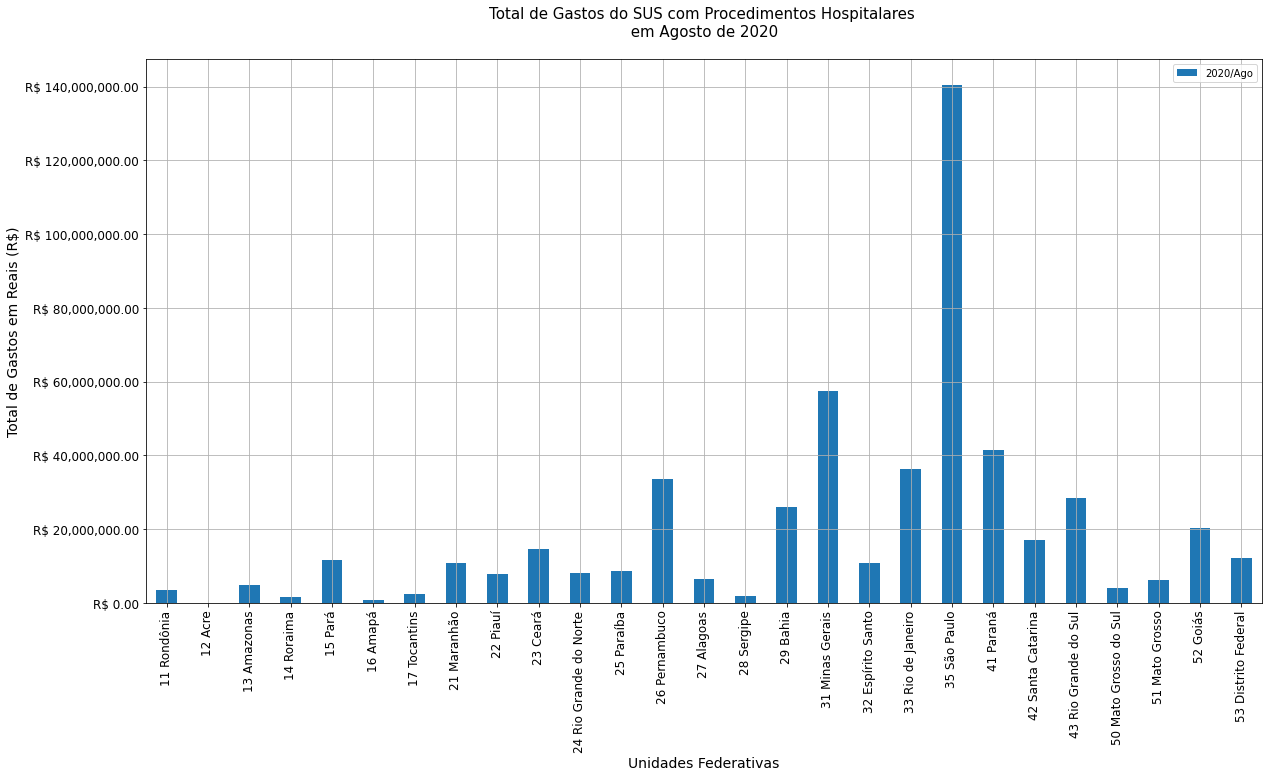

In [152]:
#Plotando o gráfico para o mês atual

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x="Unidade da Federação", y="2020/Ago", kind="bar", figsize=(20,10), grid=True, fontsize=12)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.ylabel('Total de Gastos em Reais (R$)', fontsize=14)
plt.xlabel("Unidades Federativas", fontsize=14)
plt.title("Total de Gastos do SUS com Procedimentos Hospitalares \n em Agosto de 2020 \n", fontsize = 15)
plt.show()

In [153]:
#Ordenando os valores para plotar no gráfico
dados = dados.sort_values('2020/Ago', ascending=True)

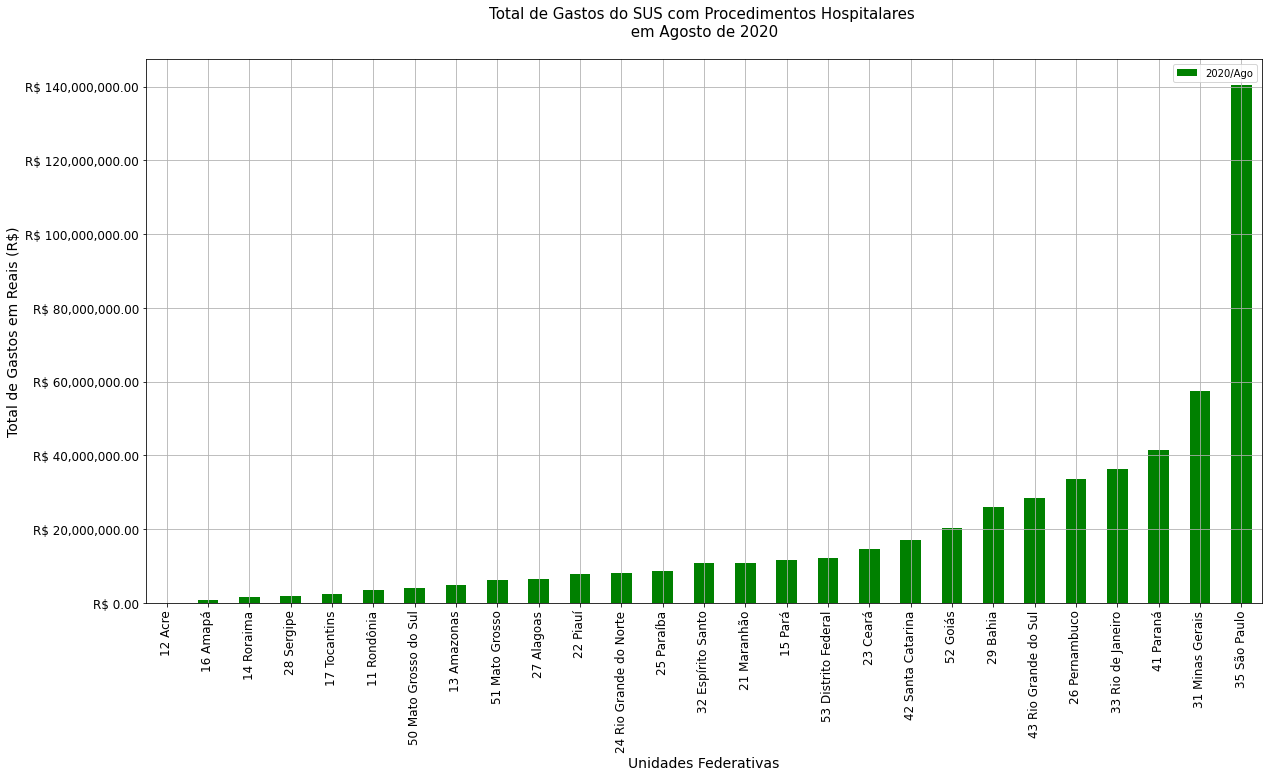

In [154]:
#Plotando o gráfico para o mês atual ordenado

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x="Unidade da Federação", y="2020/Ago", kind="bar", figsize=(20,10), grid=True, fontsize=12, color="green")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.ylabel('Total de Gastos em Reais (R$)', fontsize=14)
plt.xlabel("Unidades Federativas", fontsize=14)
plt.title("Total de Gastos do SUS com Procedimentos Hospitalares \n em Agosto de 2020 \n", fontsize = 15)
plt.show()

# Aula 2 - Primeiras visualizações de dados

In [155]:
#Obtendo somente os meses/anos com dados usáveis
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis = 1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,0.00
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,1420892.01,1367235.47,1550340.63,1550166.99,1635676.50,1647903.31,1649380.76,1702307.43,1617603.91,1863376.50,1899215.36,1929012.06,1776155.94,1765731.76,2038762.73,1820033.62,1806092.38,1669318.82,1551083.36,1713037.45,1448489.25,1850181.41,1860225.48,1739371.09,1826492.45,1827433.46,1933782.60,1721224.14,1679410.24,1672233.87,...,2125677.11,2128578.23,1873120.82,1990850.21,1920807.56,1915176.64,1782927.17,1610779.22,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,834187.31
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04
28 Sergipe,27453.63,78565.19,122952.94,775705.52,2765495.63,5439985.99,4636850.76,5017838.07,5265951.03,5367094.94,4981036.36,4928822.87,4543252.50,4525676.82,4566052.38,4716241.96,4272627.88,5037054.40,4983217.59,6504862.57,5772732.46,6111674.22,5789895.43,6122676.14,6105674.90,6019912.61,5852499.57,5722988.22,5201100.49,6261031.57,5754032.25,7057311.82,6758264.65,7452360.44,5958403.64,6660243.30,7061516.92,6924628.71,6663604.22,6691150.75,...,9086764.55,8668664.29,9021660.60,8965880.62,8464509.21,8679325.84,7578998.17,73

## Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada

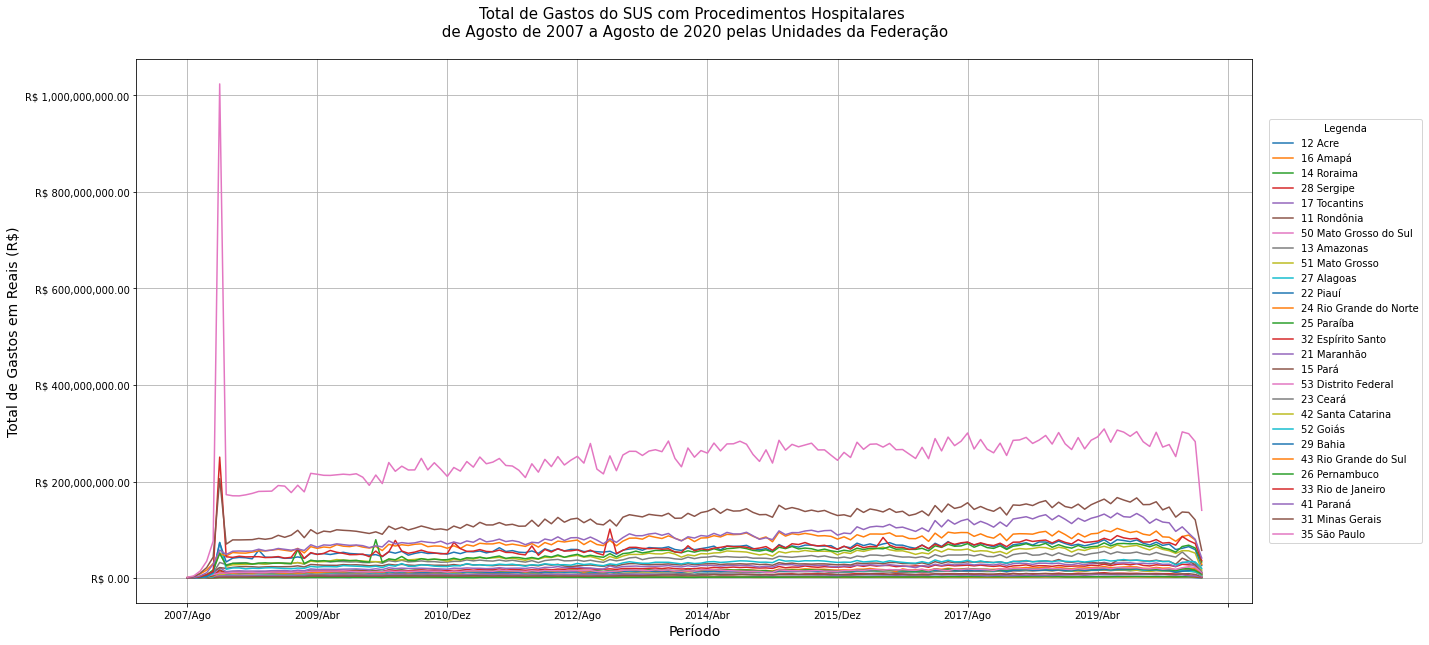

In [156]:
import matplotlib.pyplot as plt

ax = usaveis.T.plot(figsize=(20,10), grid=True)

plt.title("Total de Gastos do SUS com Procedimentos Hospitalares \n de Agosto de 2007 a Agosto de 2020 pelas Unidades da Federação \n", fontsize = 15)
plt.ylabel("Total de Gastos em Reais (R$)", fontsize=14)
plt.xlabel("Período", fontsize=14)

plt.legend(title="Legenda", bbox_to_anchor=(1.01,0.5), loc="center left")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))

plt.show()

Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência

In [157]:
usaveis.index

Index(['12 Acre', '16 Amapá', '14 Roraima', '28 Sergipe', '17 Tocantins',
       '11 Rondônia', '50 Mato Grosso do Sul', '13 Amazonas', '51 Mato Grosso',
       '27 Alagoas', '22 Piauí', '24 Rio Grande do Norte', '25 Paraíba',
       '32 Espírito Santo', '21 Maranhão', '15 Pará', '53 Distrito Federal',
       '23 Ceará', '42 Santa Catarina', '52 Goiás', '29 Bahia',
       '43 Rio Grande do Sul', '26 Pernambuco', '33 Rio de Janeiro',
       '41 Paraná', '31 Minas Gerais', '35 São Paulo'],
      dtype='object', name='Unidade da Federação')

In [158]:
#Selecionei um estado de cada região

estados_selecionados = ['13 Amazonas', '23 Ceará', '51 Mato Grosso', '35 São Paulo', '41 Paraná']
usaveis.loc[estados_selecionados]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73
23 Ceará,357904.65,572356.18,1865065.71,5131814.39,10798042.86,32444328.54,27643304.86,30085370.22,31376221.00,31189904.62,29463965.11,30302691.99,29304821.51,30435026.82,31741382.87,30415959.60,30263904.48,32123065.16,28875478.53,36018826.32,35445605.90,34894016.82,33399345.34,34459796.32,34129887.37,33410351.78,33743129.25,32285582.67,31981440.73,34001962.62,30730683.21,36109330.17,34139573.93,36838614.26,33486379.49,34320454.26,35533813.82,34034162.50,34092124.70,32807749.83,...,47759433.66,47753431.20,47800812.45,48455531.04,45911450.82,49167864.90,44738803.60,44442116.37,48586284.74,42120360.66,48637258.49,50805625.71,51998581.31,47406805.41,47916557.96,51376446.25,46560335.78,52216520.36,47717852.54,45184079.15,51302833.45,47437503.37,50654425.80,52322202.07,55371460.38,49987160.87,54340019.60,51672585.01,51735347.74,53941867.57,50213511.70,48447583.61,53086389.30,49015303.22,46395356.97,43468816.62,54200339.48,42146555.81,30809221.22,14559529.59
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,9450300.60,9789875.38,8987811.95,8843061.60,9237298.80,9459192.80,9210598.63,10039582.41,9326576.40,11680730.78,11102643.47,11495694.05,11386425.93,11658855.38,12339077.28,11600187.11,11262247.37,11734970.74,11065381.68,11839990.16,10826512.86,13243684.10,12240702.64,12781426.23,11614062.90,12193931.16,12213130.60,11923683.94,11703375.19,11484917.22,...,16543674.21,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42

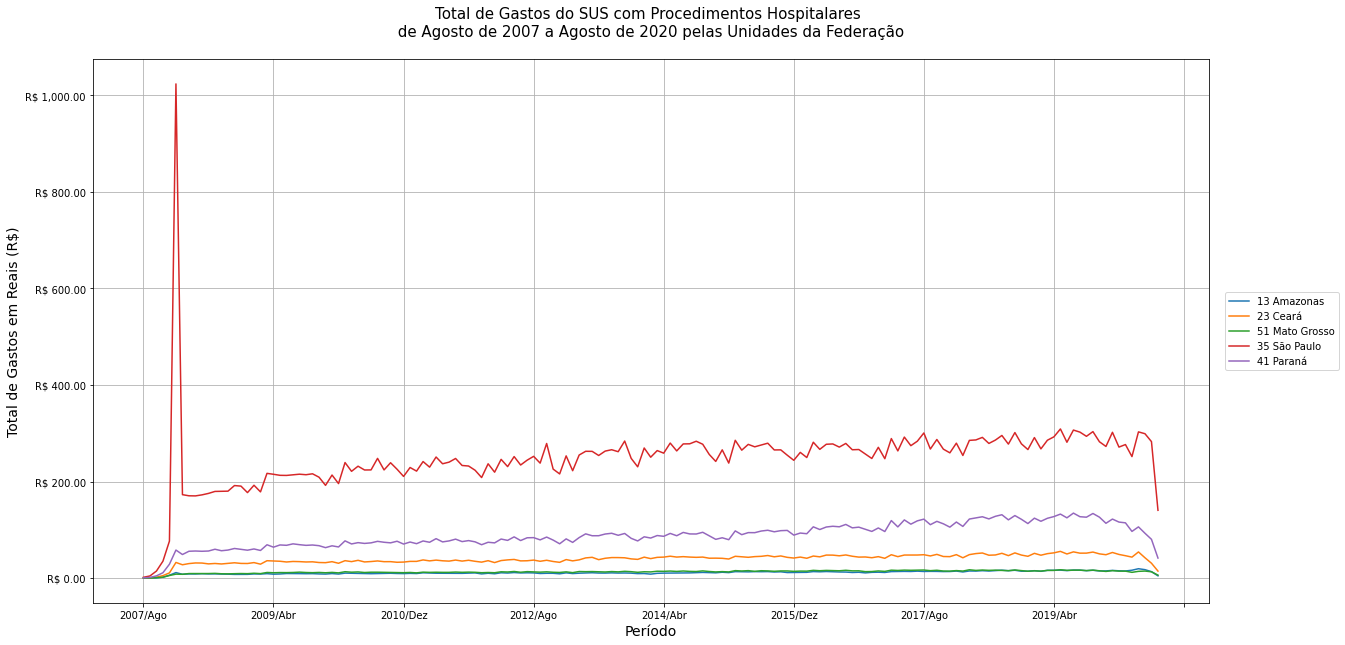

In [159]:
ax = (usaveis.loc[estados_selecionados].T / 1000000).plot(figsize=(20,10), grid=True)
ax.set_title('Total de Gastos do SUS com Procedimentos Hospitalares \n de Agosto de 2007 a Agosto de 2020 pelas Unidades da Federação \n',fontsize = 15)
ax.set_ylabel('Total de Gastos em Reais (R$)', fontsize = 14)
ax.set_xlabel('Período', fontsize = 14)
plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.show()

# Aula 3 - Manipulação de Dados

## Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.

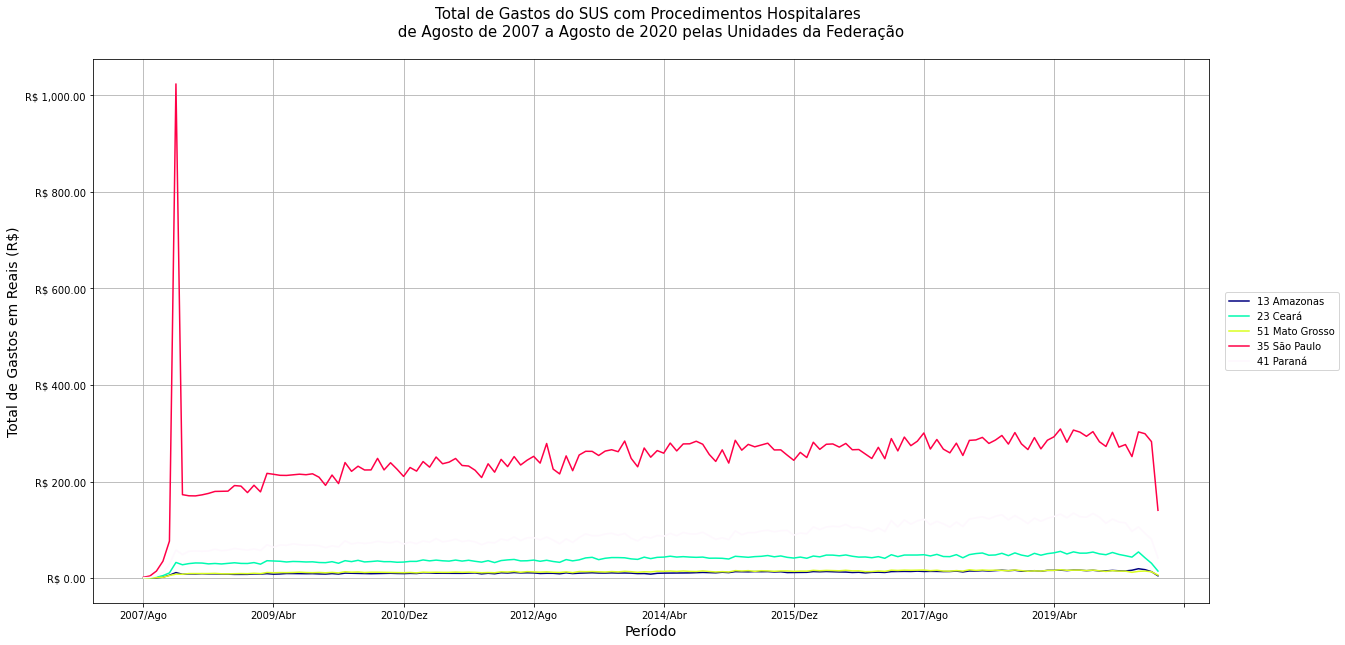

In [160]:
ax = (usaveis.loc[estados_selecionados].T / 1000000).plot(figsize=(20,10), grid=True, colormap='gist_ncar')
ax.set_title('Total de Gastos do SUS com Procedimentos Hospitalares \n de Agosto de 2007 a Agosto de 2020 pelas Unidades da Federação \n', fontsize = 15)
ax.set_ylabel('Total de Gastos em Reais (R$)', fontsize = 14)
ax.set_xlabel('Período', fontsize = 14)
plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.show()

## Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

In [161]:
usaveis['Regiões'] = usaveis.index.str[0]
regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
usaveis['Regiões'] = usaveis['Regiões'].map(regioes)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Regiões
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,0.00,Norte
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,1420892.01,1367235.47,1550340.63,1550166.99,1635676.50,1647903.31,1649380.76,1702307.43,1617603.91,1863376.50,1899215.36,1929012.06,1776155.94,1765731.76,2038762.73,1820033.62,1806092.38,1669318.82,1551083.36,1713037.45,1448489.25,1850181.41,1860225.48,1739371.09,1826492.45,1827433.46,1933782.60,1721224.14,1679410.24,1672233.87,...,2128578.23,1873120.82,1990850.21,1920807.56,1915176.64,1782927.17,1610779.22,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,834187.31,Norte
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,Norte
28 Sergipe,27453.63,78565.19,122952.94,775705.52,2765495.63,5439985.99,4636850.76,5017838.07,5265951.03,5367094.94,4981036.36,4928822.87,4543252.50,4525676.82,4566052.38,4716241.96,4272627.88,5037054.40,4983217.59,6504862.57,5772732.46,6111674.22,5789895.43,6122676.14,6105674.90,6019912.61,5852499.57,5722988.22,5201100.49,6261031.57,5754032.25,7057311.82,6758264.65,7452360.44,5958403.64,6660243.30,7061516.92,6924628.71,6663604.22,6691150.75,...,8668664.29,9021660.60,8965880.62,8464509.21,8679325.84,7578998.17,7350893.95,9313556.40,7817772

In [162]:
usaveis["Total"] = usaveis.sum(axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Regiões,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,0.00,Norte,420666755.81
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,1420892.01,1367235.47,1550340.63,1550166.99,1635676.50,1647903.31,1649380.76,1702307.43,1617603.91,1863376.50,1899215.36,1929012.06,1776155.94,1765731.76,2038762.73,1820033.62,1806092.38,1669318.82,1551083.36,1713037.45,1448489.25,1850181.41,1860225.48,1739371.09,1826492.45,1827433.46,1933782.60,1721224.14,1679410.24,1672233.87,...,1873120.82,1990850.21,1920807.56,1915176.64,1782927.17,1610779.22,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,834187.31,Norte,291615887.03
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,Norte,305010469.49
28 Sergipe,27453.63,78565.19,122952.94,775705.52,2765495.63,5439985.99,4636850.76,5017838.07,5265951.03,5367094.94,4981036.36,4928822.87,4543252.50,4525676.82,4566052.38,4716241.96,4272627.88,5037054.40,4983217.59,6504862.57,5772732.46,6111674.22,5789895.43,6122676.14,6105674.90,6019912.61,5852499.57,5722988.22,5201100.49,6261031.57,5754032.25,7057311.82,6758264.65,7452360.44,5958403.64,6660243.30,7061516.92,6924628.71,6663604.22,6691150.75,...,9021660.60,8965880.62,8464509.21,8679325.84,7578998.17,7350893.95,9313556.40,7817772.09,9831

In [163]:
ordenado_total = usaveis.sort_values("Total",ascending=False)
ordenado_total = ordenado_total.drop("Total", axis =1)
ordenado_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Regiões
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95,Sudeste
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06,Sudeste
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41542401.16,Sul
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,5292869

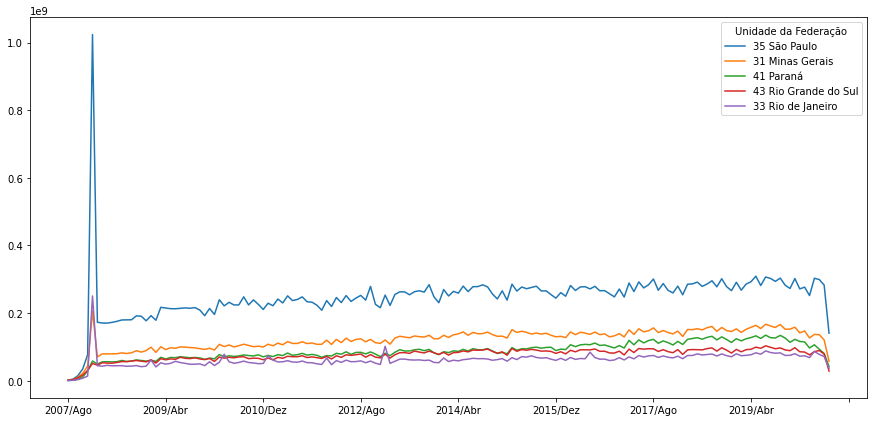

In [164]:
ordenado_total = ordenado_total.drop('Regiões', axis=1)
ordenado_total.head().T.plot(figsize=(15,7))

## Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

In [165]:
colunas_interessadas = ordenado_total.columns[6:]
ordenado_total = ordenado_total[colunas_interessadas]

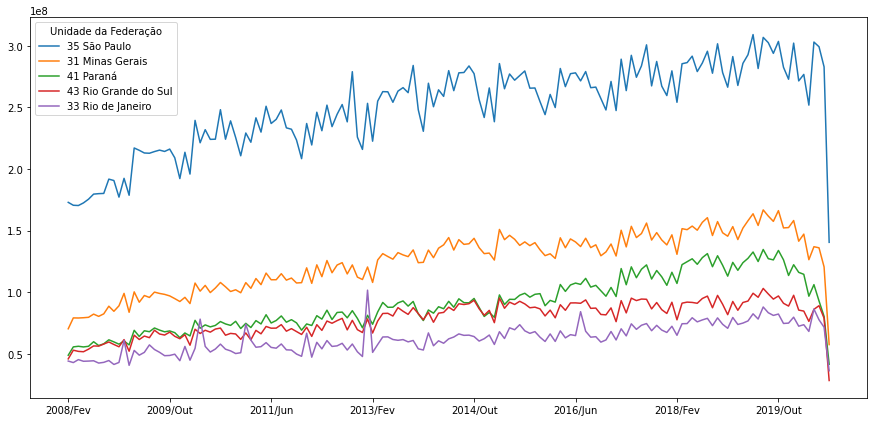

In [166]:
ordenado_total.head(5).T.plot(figsize=(15,7))

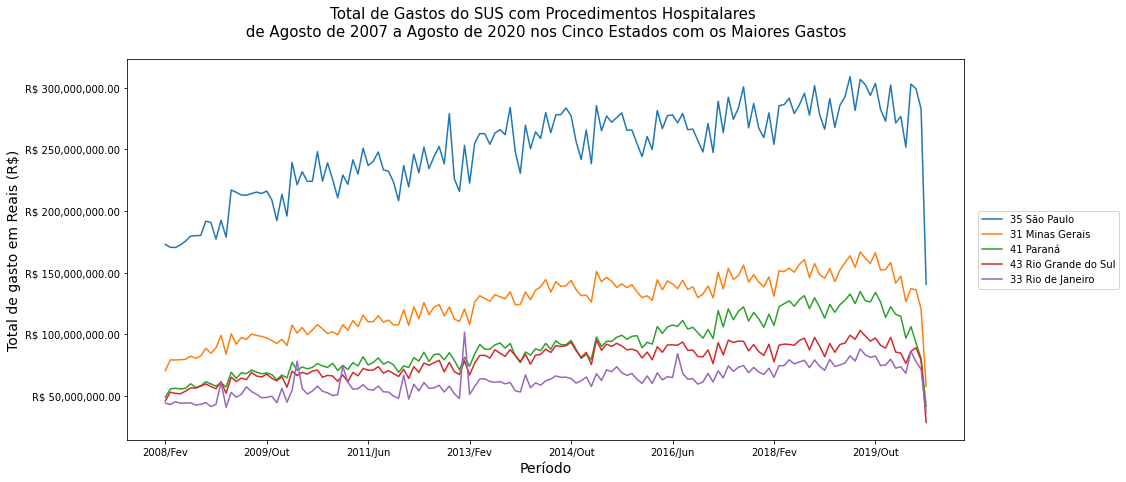

In [167]:
ax = ordenado_total.head(5).T.plot(figsize=(15,7))
ax.set_title('Total de Gastos do SUS com Procedimentos Hospitalares \n de Agosto de 2007 a Agosto de 2020 nos Cinco Estados com os Maiores Gastos \n', fontsize = 15)
ax.set_ylabel('Total de gasto em Reais (R$)', fontsize = 14)
ax.set_xlabel('Período', fontsize = 14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))
plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left')
plt.show()

## Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente

In [168]:
# Meu estado consta no Gráfico anterior, então vou selecionar 52 Goiás

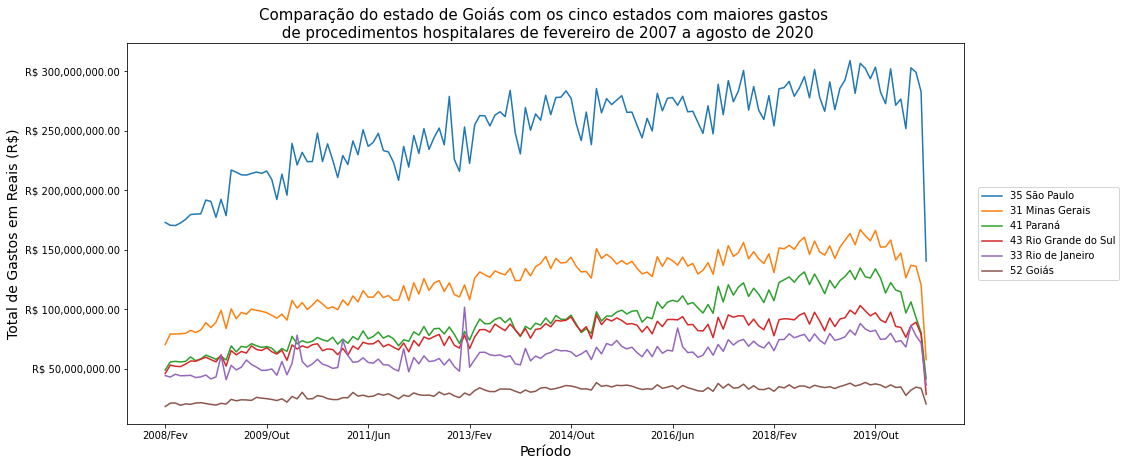

In [169]:
ax = ordenado_total.head(5).T.plot(figsize=(15,7))
ax.plot(ordenado_total.loc['52 Goiás', '2008/Fev':'2020/Ago'], label = '52 Goiás')

plt.title('Comparação do estado de Goiás com os cinco estados com maiores gastos \n de procedimentos hospitalares de fevereiro de 2007 a agosto de 2020', fontsize = 15)
ax.set_ylabel('Total de Gastos em Reais (R$)', fontsize = 14)
ax.set_xlabel('Período', fontsize = 14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.legend(bbox_to_anchor=(1.01,0.5), loc="center left")
plt.show()

## Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

## Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

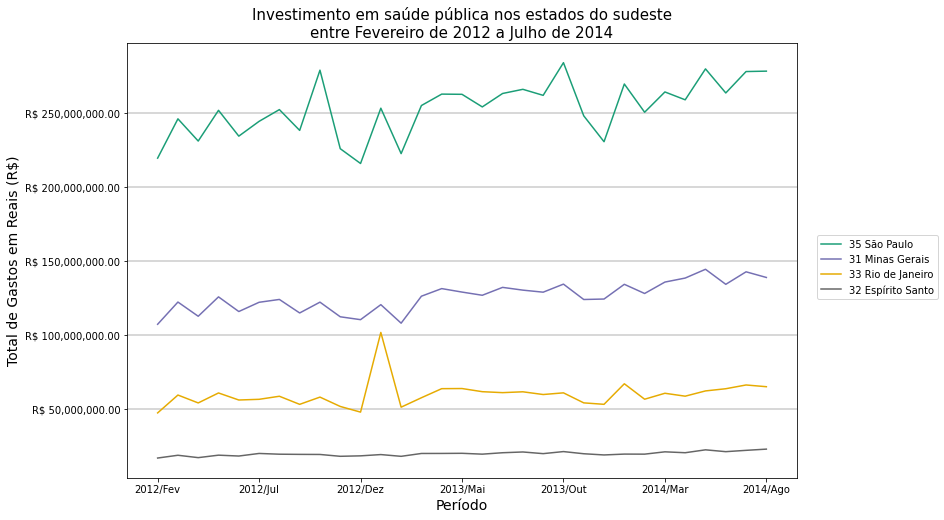

In [174]:
regiao_sudeste = usaveis.drop(usaveis.iloc[:, 0:54], axis =1)
regiao_sudeste = regiao_sudeste.T[["35 São Paulo", "31 Minas Gerais", "33 Rio de Janeiro", "32 Espírito Santo"]]
regiao_sudeste = regiao_sudeste[:-74]
axis = regiao_sudeste.plot(figsize=(12,8), colormap='Dark2')
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.ylabel("Total de Gastos em Reais (R$)", fontsize=14)
plt.xlabel("Período", fontsize=14)
plt.title("Investimento em saúde pública nos estados do sudeste\nentre Fevereiro de 2012 a Julho de 2014",
         fontsize=15)
plt.grid(color='gray',linestyle='-',which='major',axis ='y',linewidth=2,alpha= 0.3)
plt.legend(loc="lower center", bbox_to_anchor=(1.12, 0.4), ncol= 1)

plt.show()

## Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.